Getting data from other source
---
Pandas provide the tools to get historic data from many remote data source [link text](https://pydata.github.io/pandas-datareader/remote_data.html)
Some of them required the key, some are not. You can see the usage in the given link.


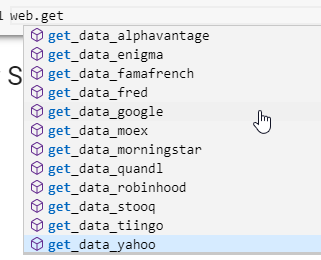

What you have to do is just add the code to the correct provider

The list of datasource is also [shown](https://github.com/wilsonfreitas/awesome-quant#data-sources) 

In [1]:
# Getting Data from other resources
# We can get the data from any web services as well See the example of getting the Bank Of Thailand example

import http.client

conn = http.client.HTTPSConnection("apigw1.bot.or.th")

headers = {
    'x-ibm-client-id': "cead92ce-cf4e-448d-a714-443b8ced38d6",
    'accept': "application/json"
    }

conn.request("GET", "/bot/public/DepositRate/v2/deposit_rate_/?start_period=2021-08-01&end_period=2021-09-01", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))


{"result":{"timestamp":"2021-09-22 21:56:23","api":"Deposit Interest Rates for Individuals of Commercial Banks (Percent per annum)","data":{"data_detail":[{"period":"2021-08-02","bank_type_name_th":"ธนาคารพาณิชย์จดทะเบียนในประเทศ","bank_type_name_eng":"Commercial Banks registered in Thailand","bank_name_th":"กรุงเทพ","bank_name_eng":"Bangkok Bank","saving_min":"0.2500","saving_max":"0.2500","fix_3_mths_min":"0.3750","fix_3_mths_max":"0.3750","fix_6_mths_min":"0.5000","fix_6_mths_max":"0.5000","fix_12_mths_min":"0.5000","fix_12_mths_max":"0.5000","fix_24_mths_min":"0.5000","fix_24_mths_max":"0.5000"},{"period":"2021-08-02","bank_type_name_th":"ธนาคารพาณิชย์จดทะเบียนในประเทศ","bank_type_name_eng":"Commercial Banks registered in Thailand","bank_name_th":"กรุงไทย","bank_name_eng":"Krung Thai Bank","saving_min":"0.2500","saving_max":"0.2500","fix_3_mths_min":"0.3200","fix_3_mths_max":"0.3200","fix_6_mths_min":"0.4000","fix_6_mths_max":"0.4000","fix_12_mths_min":"0.4000","fix_12_mths_max":"0

In [2]:
# Hands on Web API
# Create the data frame for "Deposit Interest Rates for Individuals of Commercial Banks (Percent per annum)"

import pandas as pd
%matplotlib inline

# Transform json file to pandas datafreme

j = pd.io.json.loads(data.decode("utf-8"))
print(type(j))
j

<class 'dict'>


{'result': {'timestamp': '2021-09-22 21:56:23',
  'api': 'Deposit Interest Rates for Individuals of Commercial Banks (Percent per annum)',
  'data': {'data_detail': [{'period': '2021-08-02',
     'bank_type_name_th': 'ธนาคารพาณิชย์จดทะเบียนในประเทศ',
     'bank_type_name_eng': 'Commercial Banks registered in Thailand',
     'bank_name_th': 'กรุงเทพ',
     'bank_name_eng': 'Bangkok Bank',
     'saving_min': '0.2500',
     'saving_max': '0.2500',
     'fix_3_mths_min': '0.3750',
     'fix_3_mths_max': '0.3750',
     'fix_6_mths_min': '0.5000',
     'fix_6_mths_max': '0.5000',
     'fix_12_mths_min': '0.5000',
     'fix_12_mths_max': '0.5000',
     'fix_24_mths_min': '0.5000',
     'fix_24_mths_max': '0.5000'},
    {'period': '2021-08-02',
     'bank_type_name_th': 'ธนาคารพาณิชย์จดทะเบียนในประเทศ',
     'bank_type_name_eng': 'Commercial Banks registered in Thailand',
     'bank_name_th': 'กรุงไทย',
     'bank_name_eng': 'Krung Thai Bank',
     'saving_min': '0.2500',
     'saving_max': '0

In [3]:
#list inside is dict 
j['result']['data']['data_detail']
# Transform json file to pandas datafreme
df=pd.DataFrame(j['result']['data']['data_detail'])
df

,period,bank_type_name_th,bank_type_name_eng,bank_name_th,bank_name_eng,saving_min,saving_max,fix_3_mths_min,fix_3_mths_max,fix_6_mths_min,fix_6_mths_max,fix_12_mths_min,fix_12_mths_max,fix_24_mths_min,fix_24_mths_max
0,2021-08-02,ธนาคารพาณิชย์จดทะเบียนในประเทศ,Commercial Banks registered in Thailand,กรุงเทพ,Bangkok Bank,0.2500,0.2500,0.3750,0.3750,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,2021-08-02,ธนาคารพาณิชย์จดทะเบียนในประเทศ,Commercial Banks registered in Thailand,กรุงไทย,Krung Thai Bank,0.2500,0.2500,0.3200,0.3200,0.4000,0.4000,0.4000,0.4000,0.4500,0.4500
2,2021-08-02,ธนาคารพาณิชย์จดทะเบียนในประเทศ,Commercial Banks registered in Thailand,กสิกรไทย,Kasikornbank,0.2500,0.2500,0.3200,0.3200,0.4000,0.4000,0.4000,0.4000,0.4500,0.4500
3,2021-08-02,ธนาคารพาณิชย์จดทะเบียนในประเทศ,Commercial Banks registered in Thailand,ไทยพาณิชย์,The Siam Commercial Bank,0.2500,0.2500,0.3200,0.3200,0.4000,0.4000,0.4000,0.4000,0.4500,0.4500
4,2021-08-02,ธนาคารพาณิชย์จดทะเบียนในประเทศ,Commercial Banks registered in Thailand,กรุงศรีอยุธยา,Bank of Ayudhya,0.2500,0.2500,0.3200,0.3200,0.4000,0.4000,0.4000,0.4000,0.4500,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2021-09-01,สาขาธนาคารต่างประเทศ,Foreign Bank Branches,อินเดียนโอเวอร์ซีส์,Indian Overseas Bank,0.3500,0.3500,0.4500,0.4500,0.7000,0.7000,0.8000,0.8000,0.8000,0.8000
634,2021-09-01,สาขาธนาคารต่างประเทศ,Foreign Bank Branches,อาร์ เอช บี,RHB Bank Berhad,0.5000,0.7500,0.7500,0.8500,0.9500,1.0500,1.1500,1.3500,,
635,2021-09-01,สาขาธนาคารต่างประเทศ,Foreign Bank Branches,โอเวอร์ซี-ไชนิสแบงกิ้งคอร์ปอเรชั่น,Oversea Chinese Banking Corporation,0.0250,0.0250,0.1700,0.2000,0.3000,0.3300,0.3000,0.3500,,
636,2021-09-01,สาขาธนาคารต่างประเทศ,Foreign Bank Branches,มิซูโฮ,Mizuho Bank,,,,,,,,,,


In [4]:
df.info

<bound method DataFrame.info of          period               bank_type_name_th  \
0    2021-08-02  ธนาคารพาณิชย์จดทะเบียนในประเทศ   
1    2021-08-02  ธนาคารพาณิชย์จดทะเบียนในประเทศ   
2    2021-08-02  ธนาคารพาณิชย์จดทะเบียนในประเทศ   
3    2021-08-02  ธนาคารพาณิชย์จดทะเบียนในประเทศ   
4    2021-08-02  ธนาคารพาณิชย์จดทะเบียนในประเทศ   
..          ...                             ...   
633  2021-09-01            สาขาธนาคารต่างประเทศ   
634  2021-09-01            สาขาธนาคารต่างประเทศ   
635  2021-09-01            สาขาธนาคารต่างประเทศ   
636  2021-09-01            สาขาธนาคารต่างประเทศ   
637  2021-09-01            สาขาธนาคารต่างประเทศ   

                          bank_type_name_eng  \
0    Commercial Banks registered in Thailand   
1    Commercial Banks registered in Thailand   
2    Commercial Banks registered in Thailand   
3    Commercial Banks registered in Thailand   
4    Commercial Banks registered in Thailand   
..                                       ...   
633                